# Continous stochastic processes

## Random Walks in one dimensions

Consider a random walk in continuous time in which the walker hopes right or left a distance $\delta x$ with rates $r$ and $l$. Rates have the dimension 1/time and products of rates and time intervals are dimensionless. The probability that the particle hops right in a small time interval $\Delta t$ is therefore $r\Delta t$. With probability $1-(r+l)\Delta t$ nothing happens.

![image.png](figures/RW_distribution_1d.png)

A discrete time equation describing the probability distribution then becomes

$$
\frac{\partial P(x|t)}{\partial t} = r \left[P(x-\delta x|t) - P(x|t)\right] + l \left[P(x+\delta x|t) - P(x|t)\right]
$$

We want to treat $P(x|t)$ as a continuous function of $x$ and consider smaller and smaller $\delta x$. Once $\delta x$ is small enough, we can approximate $P(x\pm \delta x|t)$ by its [Taylor series](https://en.wikipedia.org/wiki/Taylor_series)

$$
P(x\pm \delta x|t) = P(x|t) \pm \delta x \frac{\partial P(x|t)}{\partial x} + \frac{\delta x^2}{2} \frac{\partial^2 P(x|t)}{\partial x^2} + \cdots
$$

Before substituting this into the above equation, not that all terms proportional to $P(x|t)$ disappear. 
Further note that the left/right terms proportional to $\frac{\partial P(x|t)}{\partial x}$ have opposite signs, while those proportional to $\frac{\partial^2 P(x|t)}{\partial x^2}$ have the same sign. 

This then combines to the following expression

$$
\frac{\partial P(x|t)}{\partial t} = (r+l)\frac{\delta x^2 }{2}\frac{\partial^2 P(x|t)}{\partial x^2} + (l-r)\delta x \frac{\partial P(x|t)}{\partial x}
$$

Now remember that $r$ and $l$ were the rate at which the particle hops left or right a distance $\delta x$. Now that we are changing $\delta x$ and considering the limit of smaller and smaller $\delta x$, we need to adjust $r$ and $l$. 
Ultimately, we want a description that does not depend on the arbitrary choice of $\delta x$ we have made and we have to realize that $r$ and $s$ were just auxillary quantities tied to the discretization.
Defining the diffusion constant $D$ and the velocity $v$ as

$$
D = \frac{(r+l)\delta x^2}{2} \quad \mathrm{and}\quad v = (r-l)\delta x
$$

we obtain the diffusion equation

$$
\frac{\partial P(x|t)}{\partial t} = D\frac{\partial^2 P(x|t)}{\partial x^2} - v\frac{\partial P(x|t)}{\partial x}
$$

Note that the rate $r$ and $l$ we initially defined are rates and have units of 1/time. The diffusion constant therefore has units $\mathrm{length}^2/\mathrm{time}$ and the velocity $v$ has units of $\mathrm{length}/\mathrm{time}$.

### Gaussian solution
The most well known solution to the diffusion equation is the Gaussian solution, which describes the probability distribution at time $t$ in an infinite domain, if all probability was concentrated at $x=0$ at $t=0$ ($P(x,0) = \delta(x)$. 
$$
P(x|t) = \frac{1}{\sqrt{4\pi Dt}}e^{-\frac{(x-vt)^2}{4Dt}}
$$
The solution is then described by a Gaussian centered on $vt$ with variance $2Dt$. In case of simple isotropic diffusion, this generalizes to higher dimensions as $P(\mathbf{x},t) = P(x,t)P(y,t)P(z,t)$. 


### Conservation of probability and fluxes
With reflecting boundaries and in absence of "reaction", the diffusion equation has to conserve probability:
$$
\int dx\; \frac{\partial P(x,t)}{\partial t} = 0
$$
This constraint can be reformulated as a continuity equation (divergence theorem/Gauss' law)
$$
\frac{\partial P(x,t)}{\partial t} = -\nabla \cdot \mathbf{j}
$$
where the right hand side is the divergence of the probability flux $\mathbf{j}$. In one dimension, this simplifies to 
$$
\frac{\partial P(x,t)}{\partial t} = -\frac{\partial}{\partial x} j(x)
$$
which defines the diffusive flux as 
$$
j(x,t) = - \frac{\partial}{\partial x}D(x)  P(x,t) + v(x) P(x,t)
$$

### Solution in a bounded domain
Typically, one considers diffusion in a domain with absorbing or reflecting boundaries. 

 * reflecting: impenetrable wall. Zero probability flux at the boundary.
 * absorbing: everything that passes the boundary is removed. Requires $D(x)P(x)=0$ at the boundary.
 
![image.png](figures/diffusion_boundary.png)

In this case, the typical path to an analytic solution is via separation of variables, i.e. we are looking for solutions of the form $P(x,t) = f(x)g(t)$. Plugging this ansatz into the diffusion equation, and dividing by $P(x,t)$, we find
$$
\frac{1}{g(t)}\frac{\partial g(t)}{\partial t} = \frac{D}{f(x)}\frac{\partial^2 f(x)}{\partial x^2} - \frac{v}{f(x)}\frac{\partial f(x)}{\partial x}
$$
Since the left hand side depends only on $t$, and the right hand side only on $x$, both sides have to be constant $-\lambda$. For $g(t)$, this corresponds to a simple exponential decay:
$$
g(t) = ae^{-\lambda t} 
$$
For $f(x)$, we need to solve $D\frac{\partial^2 f(x)}{\partial^2 x} - v\frac{\partial f(x)}{\partial x} + \lambda f(x)$ for which we can make an exponential ansatz $f(x) = e^{\alpha x}$. The equation then becomes
$$
\left(\alpha^2 - \frac{v}{D}\alpha + \lambda \right) f(x) = 0
$$
from which we deduce that 
$$
\alpha = \frac{v}{2D} \pm \sqrt{\frac{v^2}{4D^2} - \frac{\lambda}{D}}
$$
If $\lambda > \frac{v^2}{4D}$, the discriminant is negative and $\alpha$ is a pair of complex conjugate roots. 

#### Purely diffusive case
It is instructive to first consider the case of $v=0$. In this case, $\alpha = \pm i \sqrt{\lambda/D}$ and
$$
f(x) = b \sin(\sqrt{\lambda/D}x) + c \cos(\sqrt{\lambda/D}x)
$$
Note that only certain values of $\lambda$ are admissible given the boundary conditions. At a reflecting boundary, the derivative of $P(x,t)$ has to be zero at all times, while $P(x,t)$ has to vanish at an absorbing boundary. These conditions reduce the continuum of values for $\lambda$ to a countable number. Without loss of generality, we can define our domain as starting at $x=0$ and extending to $x=L$.
If the boundary at $x=0$ is absorbing ($f(0)=0$) we need $c=0$ ($b=0$ in the reflecting case). 

And absorbing boundary at $x=L$ would therefore require $f(L)=0$ for all values of $b$ and $c$ permitted by the boundary at $x=0$. If the boundary at $x=0$ is reflecting (only the $\cos$ terms, $b=0$), a reflecting boundary at $x=L$ requires $\cos(\sqrt{\lambda/D}L)=1$ and thus
$$
\lambda_n = \frac{D n^2 \pi^2}{L^2} \quad n=0, 1, \ldots
$$
We therefore have a discretized spectrum of admissible time scales and a full solution
$$
P(x,t) = \sum_n a_n e^{-\lambda_n t} \cos(\sqrt{\lambda_n/D}x)
$$
The coefficients $a_n$ are determined by the initial condition and correspond to the coefficients of the Fourier transform of the initial condition over the interval $0,L$.

#### Example: step function initial condition 

Consider a situation where initially half the domain is filled at a level $p_0$. 
![image.png](figures/diffusion_initial.png)

The fourier coefficients are 
$$
a_n = \frac{1}{L} \int_0^L \cos(n\pi x/L) P(x,0) = \frac{p_0}{L} \int_0^{L/2} \cos(n\pi x/L) = \begin{cases}
\frac{p_0}{2} & n=0 \\
\frac{2 p_0}{n\pi}\sin(n\pi/2) & n>0
\end{cases}
$$
Note that the coefficients for $n>0$ are multiplied by 2 to account for negative $n$.
We can approximate the function by including more and more terms. Note that at early times, this solution will not be very accurate because the initial rapid dynamics of solution depends on higher modes. 

Text(0.5, 0, 'position')

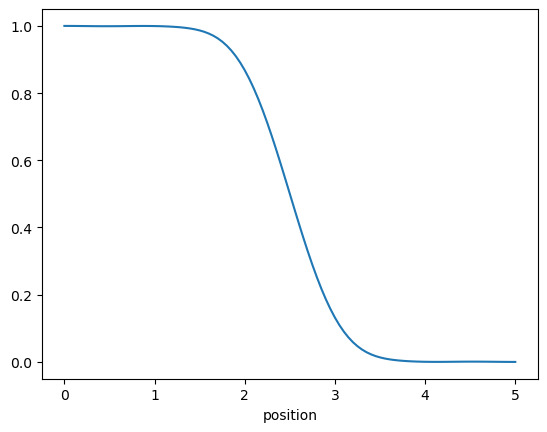

In [4]:
import numpy as np
import matplotlib.pyplot as plt

L=5
D=1
def approx_solution(t, x, a_n, l_n):
    return np.sum([a*np.exp(-l*t)*np.cos(np.sqrt(l/D)*x) for a,l in zip(a_n, l_n)], axis=0)

n_modes = 10
l_n = [(n*np.pi)**2*D/L**2 for n in range(n_modes)]
a_n = [0.5] + [2*np.sin(n*np.pi/2)/np.pi/n for n in range(1,n_modes)]

x_vals = np.linspace(0,L,101)

plt.plot(x_vals, approx_solution(.1, x_vals, a_n, l_n))
plt.xlabel('position')

### Position dependent hopping rates
In the previous section, we considered hopping rates that are constant across the domain. In general, these hopping rates will vary and how exactly the continuous limit is taken can matter in surprising ways. 
$$
\frac{\partial P(x|t)}{\partial t} = r(x-\delta x) P(x-\delta x|t) + l(x+\delta x) P(x+\delta x|t) - (r(x) + l(x)) P(x|t)
$$
Expanding $r(x)P(x|t)$ and $l(x)P(x|t)$ in $x$, we obtain a similar equation as before, only that the diffusion coefficient and the drift velocity are inside the derivatives.
$$
\frac{\partial P(x|t)}{\partial t} = \frac{\partial^2}{\partial x^2} D(x) P(x|t) - \frac{\partial}{\partial x} v(x)P(x|t)
$$
with
$$
D(x) = \frac{r(x)+l(x)}{2}\delta x^2 \quad \mathrm{and}\quad v(x) = (r(x)-l(x))\delta x
$$

Note that we have made a subtle but important assumption: The hopping rates are evaluated at the point of departure! If instead we had assumed that the hopping rates are evaluated mid-way between departure and destination, we would have arrived at a subtly different equation -- an effect that we will explore in greater detail below. 

### Exploration of position dependent diffusion constant

If the diffusion constant depends on the position, even in absence of directed motion the equilibrium is not necessarily flat. Consider a simple example of a diffusion constant $D(x)=1+x$ (while supressing the units) and $v(x)=0$. At steady state, we have
$$
 J = - \frac{\partial}{\partial_x} D(x)P(x)
$$
which in case of a no-flux solution requires $D(x)P(x) =  C$. Hence $P(x)$ is inversely proportional to $D(x)$ in an equilibrium. 

This is indeed bourne out by numerical solution of the equation:


Text(0.5, 0, 'position')

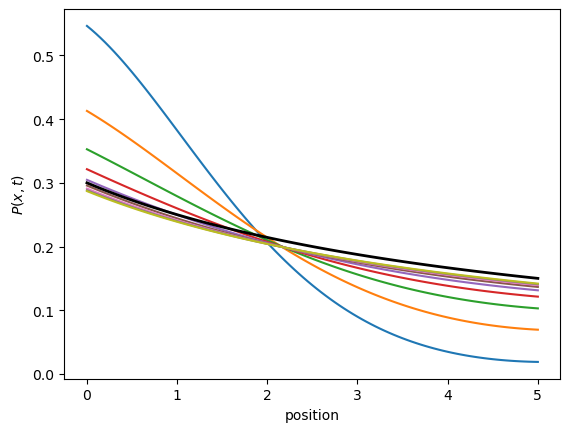

In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Numerical solution of the discretized diffusion equation
def dpdt(p, r, l, reflecting=True, flux=0):
    dp = np.zeros_like(p)
    dp[1:-1] += r[:-2]*p[:-2] - (r[1:-1] + l[1:-1])*p[1:-1] + l[2:]*p[2:]
    # reflecting boundaries on both sides
    if reflecting:
        dp[0] += l[1]*p[1] - r[0]*p[0]
        dp[-1] += r[-2]*p[-2] - l[-1]*p[-1]
    else:
        dp[0] += l[1]*p[1] - (r[0]+l[0])*p[0]
        dp[-1] += r[-2]*p[-2] - (l[-1]+r[-1])*p[-1]

    dp[0] += flux

    return dp

x = np.linspace(0,5,101)
dx = x[1]-x[0]
D = 1 + x*0.2  # position dependent diffusion constant
p = np.zeros_like(x)
p[x<1]=1
T = np.linspace(0,10,10)
r = D/dx**2

dt = 0.0001
tp = 1
t=0
plt.figure()
while tp<len(T):
    while t<T[tp]:
        p += dt*dpdt(p,r,r, reflecting=True, flux=0)
        t += dt
    tp+=1
    plt.plot(x,p)

plt.plot(x, 0.3/D, lw=2, c='k')
plt.ylabel(r"$P(x,t)$")
plt.xlabel("position")


## Zero current -- potential solution
In a situation where we have zero net current at steady state, analogous to the detailed balance condition earlier, the Fokker-Planck equation reduces to a much simpler equation. In one dimension, we get:
$$
j(x) = 0 = - \frac{\partial}{\partial x}D(x)  P(x) + v(x) P(x)
$$
This is solved by 
$$
P(x) = \frac{C}{D(x)} e^{\int_0^x dx' \; \frac{v(x')}{D(x')}} \, . 
$$
If $v(x)$ arises as a force derived from a potential ($F \sim U'(x)$), the velocity is proportional to the force and the inverse viscosity $\eta(x)$ ($v(x) \sim U'(x)/\eta(x)$). In this case, we can establish a connection between the Boltzmann distribution and the steady state solution to the Fokker-Plank equation: 
$$
P(x) = \frac{C}{D(x)} e^{\int_0^x dx' \; \alpha\frac{U'(x')}{\eta(x') D(x')}}  \sim e^{-\frac{U(x)}{kT}}
$$
where $\alpha$ is the proportionality factor depending on the geometrical properties of the object subject to the force ($\alpha = \frac{1}{6\pi r}$ for a shpere of radius $r$). 
For this equation to hold, diffusion coefficients $D(x)$ itself needs to be inversely proportional to the vicosity, which leads to the well known Stokes-Einstein relation for a spherical body:
$$
D = \frac{kT}{6\pi r \eta}
$$
This relation is remarkable, as it establishes a connection between properties at the microscale (random motion due to thermal noise) and macroscale (viscosity of the medium). It is one example of a larger class of fluctuation dissipation theorems in statistical mechanics.


### High-dimensional generalizations

Most of the reasoning above generalizes naturally to many dimensions. We can write down a multi-dimensional Fokker-Planck equation
$$
\frac{\partial}{\partial t} P(\vec{x}, t)  = -\sum_i\frac{\partial}{\partial x_i} A_i(\vec{x}) P(\vec{x},t) + -\frac{1}{2}\sum_{ij}\frac{\partial^2}{\partial x_i\partial x_j} D_{ij}(\vec{x}) P(\vec{x},t)
$$
where $A_i$ is the generalization of the drift velocity $v$ and $D_{ij}$ is a symmetric matrix describing the diffusion processes (which does not need to be diagonal).
The Green's function of this equation is a multi-dimensional Gaussian with covariance matrix $D_{ij}$.
$$
P(\vec{x}, t| \vec{y}) \sim \exp\left[-\frac{1}{2t}\sum_{ij} (A_i t - (x_i-y_i))D_{ij}^{-1} (A_j t - (x_j-y_j))\right]
$$
In a time interval $\Delta t$, the state $\vec{x}$ of the system thus changes from the initial one at $\vec{y}$ by a deterministic component $A_i \Delta t$, and a random component with covariance matrix $D_{ij} \Delta t$. 
Since the symmetric matrix $D_{ij}$ can be expressed as a matrix product $D_{ij} = \sum_k B_{ik}B_{kj}$, the random component can be understood as a displacement 
$$
\xi_i(t) = \sqrt{\Delta t}\sum_k B_{ik}\eta_k
$$
where $\eta_k$ is a univariate Gaussian random variable with zero mean and unit variance. The matrix $B_{ik}$ can be thought of as a square root of $D_{ij}$. Note that this ``square root'' is not unique but only determined up to a rotation.

## Langevin equations
An alternative way of tackling stochastic process in continuous space are stochastic differential equations (SDE). 
From dynamical systems, we are used to equations of the form 
$$
\frac{dx_i}{dt} = A_i(\vec{x}; t)
$$
that describe the evolution of the state $\vec{x} = \{x_1, x_2, \ldots, x_n\}$. As such, this systems is Markovian: the evolution of the state of the system is fully determined by its current state and the time $t$. The functions $f_i$ describe the **deterministic** components of the motion, for example due to an external force.

Generalizing this to **stochastic motion** comes with a number of mathematical subtleties. Following the intuition developed from the Green's function above, we can write a stochastic differential equation as 
$$
d x_i =  A_i(\vec{x}; t) dt + B_{ik}(\vec{x},t) dW_k
$$
where each $dW_k$ is a so-called Wiener process. Such a Wiener process is nothing but a uni-variate diffusion process with a diffusion coefficient 1. The sample path of the Wiener process are continuous, but no-where differentiable. 

We will explore properties of such stochastic processes in one dimension only.

### Stochastic integrals (following Gardiner)
In the notation above, it is implied that there should be a ``stochastic integral'' of the form
$$
\int_0^t dW(t') f(t')
$$
for any function $f(t)$. However, this turn out to be a bit tricky. Consider as a function $f(t)$ the Wiener process $W(t)$ itself. Then, we would expect
$$
\int_0^t dW(t') W(t') \stackrel{?}{=} \frac{1}{2}\int_0^t d W^2(t') \stackrel{?}{=} \frac{1}{2}[W^2(t) - W^2(0)] 
$$
But if we now start to approximate this integral as a sum of increments
$$
\int_0^t dW(t') W(t') = \sum_i W_i \Delta W_i = \sum_{i=1} W_i(\tau_i) (W(t_{i}) - W(t_{i-1})
$$
we are left with a choice when to evaluate $W_i$, which I have called $\tau_i$. When we now take the expectation value of the integral, remember that $\langle W(t_1)W(t_2) \rangle = \min(t_1, t_2)$, and express $\tau_i = t_{i-1} + \alpha(t_i - t_{i-1})$, we have
$$
\langle \int_0^t dW(t') W(t') \rangle = \sum_i \min(\tau_i, t_{i}) - \min(\tau_i, t_{i-1}) = \sum_i \alpha (t_i - t_{i-1}) = \alpha(t - t_0)
$$
While in normal infinitesimal limits, this oddity does not arise since increments are of order $\Delta t$, for stochastic ODEs the increments are of order $\sqrt{\Delta t}$. 
As a result, the stochastic ODE is required a choice when the integrant is to be evaluated. The common choice is the beginning of the interval, i.e. $\tau_i = t_{i-1}$ and this choice is known as the **Ito stochastic integral**. 
With a little bit more work, we can evaluate not just the expectation value of the integral, but the integral itself to obtain
$$
\int_0^t dW(t') W(t') =\frac{1}{2}\left[W^2(t) - W^2(0) - (t-t_0) \right]
$$
with an additional $\frac{t-t_0}{2}$ that we didn't expect form ordinary rules of calculus. 


### Transformation of variables
The scaling of the magnitude of the noise term with $dt$ generates a number of unexpected consequences with manipulating SDEs. Consider for example a change of variables from $x$ to $y(x)$. 
$$
\begin{split}
dy(x) & = y(x+dx) - y(x) = y'\times dx + \frac{y''}{2} dx^2+\cdots \\
& = y'\times (A(x) dt + B(x)dW(x)) + \frac{y''}{2} B^2(x)dW^2 
\end{split}
$$
We had to keep second order terms $dW^2$ since $dW$ scales as $\sqrt{dt}$ and $dW^2$ generates a terms with finite average $\Delta t$ that now contributes to the deterministic drift term. The stochastic ODE for the now variable $y$ looks like
$$
dy(x) = (y'A(x) dt + \frac{y''}{2} B^2(x)) dt +  y' B(x)dW(x)
$$
During the variable transformation, the we have generated an additional 'spurious' drift term that couples to the curvature $y''$ of the transformation. 
This transformation rule is known as Ito calculus. 

### Correspondance to Fokker-Planck equations
With this Ito interpretation, the *stochastic differential equation* 
$$
d x_i =  A_i(\vec{x}; t) dt + B_{ik}(\vec{x},t) dW_k
$$
corresponds to the Fokker-Planck equation
$$
\frac{\partial}{\partial t} P(\vec{x}, t)  = -\sum_i\frac{\partial}{\partial x_i} A_i(\vec{x}) P(\vec{x},t) + -\frac{1}{2}\sum_{ij}\frac{\partial^2}{\partial x_i\partial x_j} D_{ij}(\vec{x}) P(\vec{x},t)
$$
with $D_{ij} = \sum_k B_{ik}B_{kj}$.

### Stratonovic Stochastic differential equation
An alternative interpretation of stochastic differential equations, known as Stratonovich interpretation, evaluates the integrant at the mid-point between $t_{i-1}$ and $t_i$, i.e. if $\alpha=0.5$. 
In this case, the normal rules of calculus apply (working this out is a bit tedious). 
With the Stratonovic interpretation, the *stochastic differential equation* 
$$
d x_i =  A_i(\vec{x}; t) dt + B_{ik}(\vec{x},t) dW_k
$$
corresponds to the Fokker-Planck equation
$$
\frac{\partial}{\partial t} P(\vec{x}, t)  = -\sum_i\frac{\partial}{\partial x_i} A_i(\vec{x}) P(\vec{x},t) + -\frac{1}{2}\sum_{ij}\frac{\partial}{\partial x_i} B_{ik}(\vec{x}) \frac{\partial}{\partial x_j} B_{kj}(\vec{x})  P(\vec{x},t)
$$
with $D_{ij} = \sum_k B_{ik}B_{kj}$.

This Stratonovich interpretation where stochastic terms are evaluated at mid-point arises naturally when the stochastic term is a limit of a process with finite correlation time. 
The Ito interpretation is natural in scenarios like financial markets or population genetics (see below). 

**Ito and Stratonovic agree when the noise term is independent of value of the variable.**


### Example of Wright-Fisher diffusion
Stochastic processes and diffusion are not only important when tracking physical particles, but also describe dynamics of abstract quantities, for example the frequencies of a mutation in a population. 
The simplest such model in population genetics is the Wright-Fisher model. 
Assume two variants of an allele where one has a fitness benefit $s$ over the other. The average frequency of the allele in the next generation will then be
$$
\langle x \rangle = x + sx(1-x)
$$
where the $(1-x)$ factor accounts for the increasing mean fitness in the population. 
In the sample Wright Fisher model the variance of the allele frequency is given by 
$$
\langle \delta x^2\rangle = \frac{x(1-x)}{N}
$$
where $N$ is the population size. 
The corresponding Langevin equation would be 
$$
dx = sx(1-x) + \sqrt{\frac{x(1-x)}{N}}\xi
$$
Which in turn corresponds to the diffusion equation
$$
\frac{\partial}{\partial t}P(x,t) = \frac{\partial^2}{\partial x^2} \frac{x(1-x)}{2N}P(x,t) - s\frac{\partial}{\partial x} x(1-x)P(x,t)
$$


### Solution for a neutral allele

If $s=0$, the Kimura equation can be solved exactly. As before, the key to the solution is an ansatz of the form $P(x,t) = f(x)g(t)$ which immediately decomposes the problem to $g(t) = e^{-\lambda t}$ and 
$$
-2N\lambda f(x) = \frac{\partial^2}{\partial x^2} x(1-x)f(x) = x(1-x)f''(x) - 2(2x-1)f'(x) - 2f(x)
$$
This ODE is known as hypergeometric equation. Both $x=0$ and $x=1$ act as absorbing boundaries. Since we the diffusivity also goes to 0 at these ends, we only need to require a finite value in this case. These conditions restrict the possible solution to what is called the Gegenbauer polynomials. 
Furthermore, the admissible values of $\lambda$ are quantized as 
$$
\lambda = \frac{i(i+1)}{N} \quad i=0,1,2,\ldots
$$



